# Ford GoBike System
## by Islam Saeed

## Investigation Overview

> In this analysis, I would like to figure that when and where are most trips taken, and what kind of characteristics are in these locations and time periods. The characteristics include rider's attributes (sex, age, and user_type) and duration of trips.

## Dataset Overview

> This dataset includes 183,412 trips with 15 features such as locations, time, and user attributes. The dataset is subsetted by choosing top 5 trips start stations with the most trips due to the same stations with same amount of trips in the end stations.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
import datetime
import calendar

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# load in the dataset into a pandas dataframe
gbdf = pd.read_csv('201902-fordgobike-tripdata.csv')
df_top5s = pd.read_csv("Start-fordgobike-tripdata-clean.csv")


In [4]:
# Convert time variables from string to datetime
gbdf['start_time'] = pd.to_datetime(gbdf['start_time'])
gbdf['start_month_num'] = gbdf['start_time'].apply(lambda time: time.month)
gbdf['start_time_hour_minute']=gbdf['start_time'].map(lambda x: x.strftime('%H-%m'))
gbdf['start_time_hour']=gbdf['start_time'].dt.hour
gbdf['start_time_weekday_abbr']=gbdf['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
gbdf['end_time']=pd.to_datetime(gbdf['end_time'])
gbdf['end_month_num'] = gbdf['end_time'].apply(lambda time: time.month)
gbdf['end_time_hour_minute']=gbdf['end_time'].map(lambda x: x.strftime('%H-%m'))
gbdf['end_time_hour']=gbdf['end_time'].dt.hour
gbdf['duration_min'] = gbdf['duration_sec']/60
gbdf['end_time_weekday_abbr']=gbdf['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
gbdf['start_time_year_month_renamed'] = gbdf['start_time'].dt.strftime('%y' + '-' + '%m')
#Create ages
gbdf['age'] = gbdf['member_birth_year'].apply(lambda x: 2019 - x)
#Day of the week
gbdf['start_weekday_num'] = gbdf['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
gbdf['start_weekday_char'] = gbdf['start_weekday_num'].map(dmap)
gbdf['end_weekday_num'] = gbdf['end_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
gbdf['end_weekday_char'] = gbdf['end_weekday_num'].map(dmap)

# convert weekday into ordered categorical types
ordinal_var_dict = {'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],'end_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    gbdf[var] = gbdf[var].astype(ordered_var)

## Trip Count in each weekday Top 5 stations

> Here we start with identifing the counts for the top 5 start stations

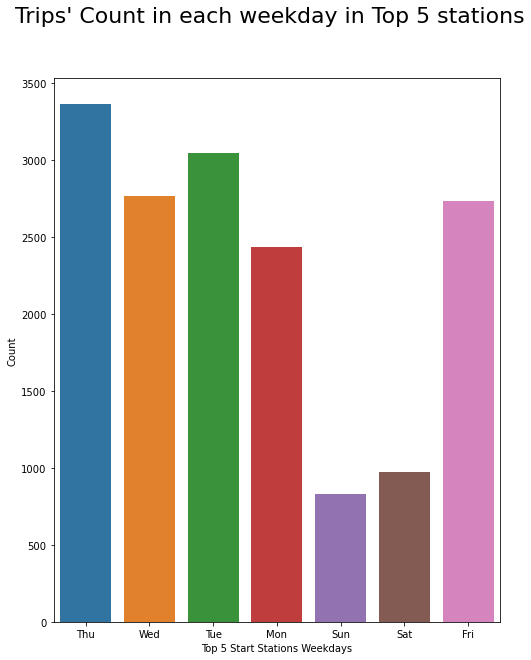

In [6]:
#Exploring top 5 
fig, ax = plt.subplots( figsize = [8,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_top5s, x = 'start_weekday_char')
ax.set_xlabel('Top 5 Start Stations Weekdays')
ax.set_ylabel('Count')

fig.suptitle('Trips\' Count in each weekday in Top 5 stations',fontsize=22);

## Duration of Bike Rides from Top 5 Visited Stations

> here we discussed the relation between the duration of Bike rides coming out of each station from the Top 5

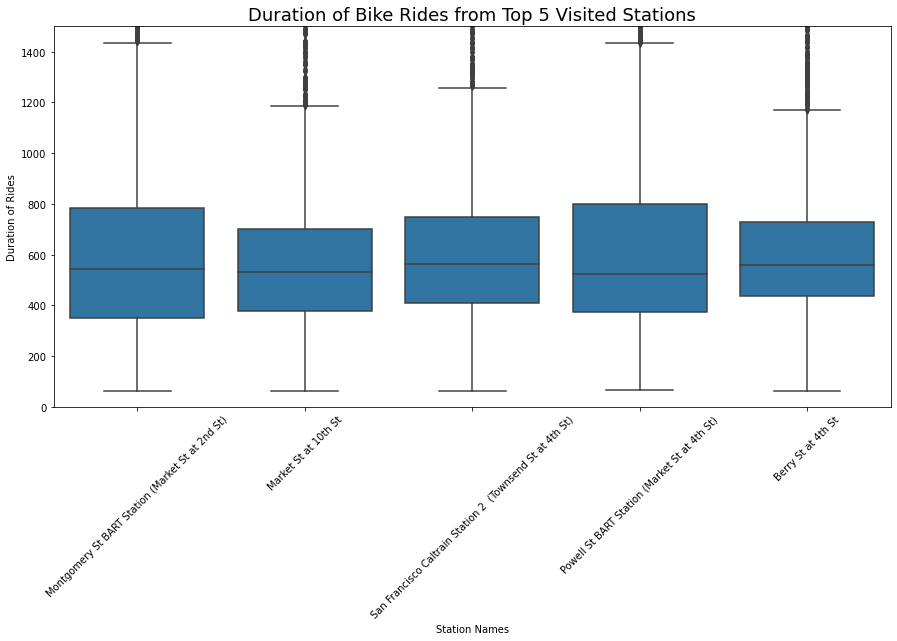

In [8]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (15,7))
sb.boxplot(data = df_top5s, x = 'start_station_name', y = 'duration_sec', color = base_color);
plt.xticks(rotation = 45);
plt.ylim(0, 1500);
plt.title('Duration of Bike Rides from Top 5 Visited Stations', fontsize = 18);
plt.xlabel('Station Names')
plt.ylabel('Duration of Rides');

## Number of Rides Taken per hour from the Top 5 Stations

> Here we worked on the relation per the number of rides per hour in each of the Top 5 Stations



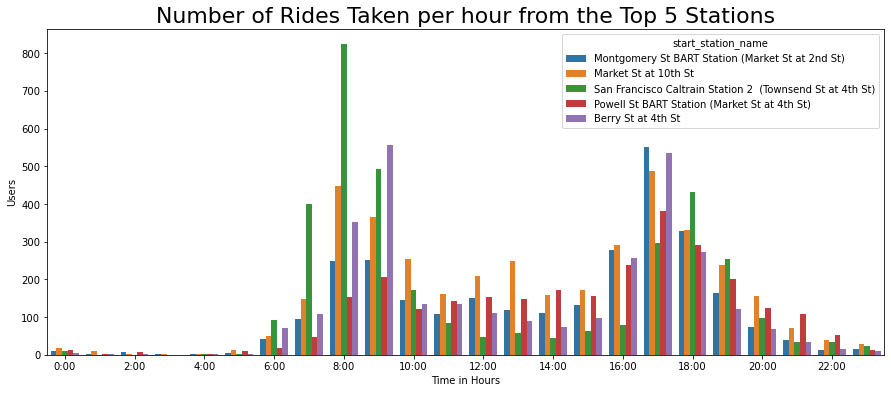

In [9]:
plt.figure(figsize = (15,6))
sb.countplot(data=df_top5s, x='start_time_hour', hue='start_station_name')
plt.title('Number of Rides Taken per hour from the Top 5 Stations', fontsize = 22)
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

In [10]:
from jupyter_core.paths import jupyter_path
print(jupyter_path('nbconvert','templates'))

['C:\\Users\\Islam\\AppData\\Roaming\\jupyter\\nbconvert\\templates', 'C:\\Users\\Islam\\anaconda3\\share\\jupyter\\nbconvert\\templates', 'C:\\ProgramData\\jupyter\\nbconvert\\templates']
